# Goals of UDS Analysis:  

1. Establish 3 cognitive classifications, MCI, AD, NC
2. Select clinical variables 


C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\1954791759.py:5: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('uds.csv')


Numeric counts of the highest NACCVNUM obtained:
NACCVNUM
1     16866
2      9262
3      6307
4      4869
5      3599
6      2865
7      2200
8      1442
9      1183
10      963
11      825
12      634
13      473
14      351
15      265
16      193
17      144
18       71
19       24
20        1
Name: count, dtype: int64


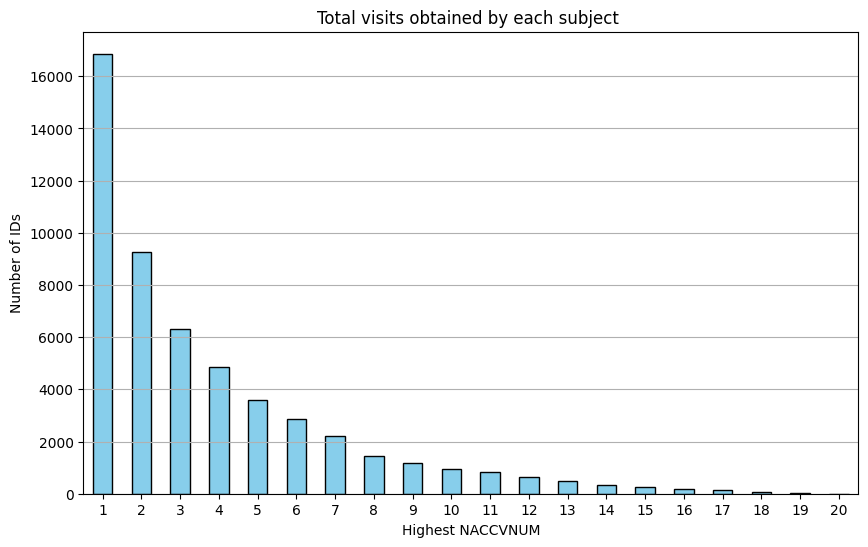

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('uds.csv')

id = 'NACCID'
num_visits = 'NACCVNUM'

max_visits = df.groupby(id)[num_visits].max()
naccvnum_counts = max_visits.value_counts()

print("Numeric counts of the highest NACCVNUM obtained:")
print(naccvnum_counts)

# Create a histogram
plt.figure(figsize=(10, 6))
naccvnum_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Highest NACCVNUM')
plt.ylabel('Number of IDs')
plt.title('Total visits obtained by each subject ')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Filter IDs that obtained up to 10 NACCVNUM
ids_with_10_visits = max_visits[max_visits == 10].index

# Create a new DataFrame with rows for these IDs
df_with_10_visits = df[df[id].isin(ids_with_10_visits)]

# Save the filtered DataFrame to a new CSV file
df_with_10_visits.to_csv('10_visits.csv', index=False)

10 Visit Cohort Analysis

C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\3736238162.py:1: DtypeWarning: Columns (22,24,28,41,44,46,51,61,63,65,67,69,71,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,179,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,397,399,401,421,423,432,445,454,494,574,605,613,638,674,690,707,710,727,738,744,831,833,835,837,843,904,959,960,961,969,970,971) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10_visits.csv')
C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\3736238162.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')


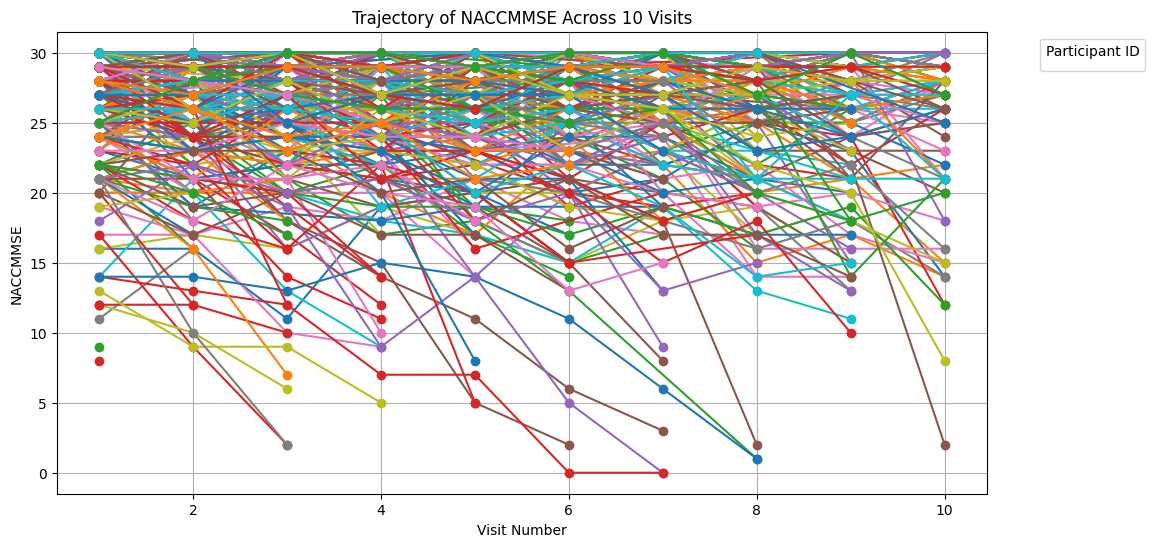

In [2]:
df = pd.read_csv('10_visits.csv')

id = 'NACCID'
num_visits = 'NACCVNUM'
nacc_mmse_score = 'NACCMMSE'


df_filtered = df[(df[nacc_mmse_score] >= 0) & (df[nacc_mmse_score] <= 30) ]
df_with_10_visits = df_filtered.sort_values(by=[id, num_visits])

plt.figure(figsize=(12, 6))
for participant_id in ids_with_10_visits:
    participant_data = df_with_10_visits[df_with_10_visits[id] == participant_id]
    plt.plot(participant_data[num_visits], participant_data[nacc_mmse_score], marker='o')

plt.xlabel('Visit Number')
plt.ylabel('NACCMMSE')
plt.title('Trajectory of NACCMMSE Across 10 Visits')
plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\4256946314.py:3: DtypeWarning: Columns (22,24,28,41,44,46,51,61,63,65,67,69,71,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,179,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,397,399,401,421,423,432,445,454,494,574,605,613,638,674,690,707,710,727,738,744,831,833,835,837,843,904,959,960,961,969,970,971) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10_visits.csv')
C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\4256946314.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')


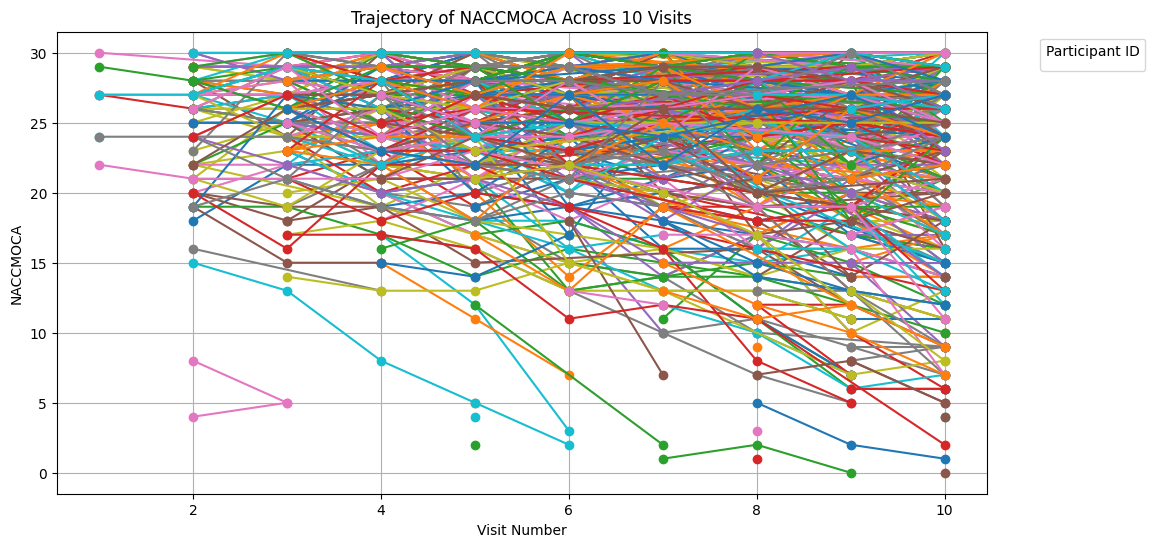

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('10_visits.csv')

id = 'NACCID'
num_visits = 'NACCVNUM'
nacc_moca_score = 'NACCMOCA'


df_filtered = df[(df[nacc_moca_score] >= 0) & (df[nacc_moca_score] <= 30) ]
df_with_10_visits = df_filtered.sort_values(by=[id, num_visits])

plt.figure(figsize=(12, 6))
for participant_id in ids_with_10_visits:
    participant_data = df_with_10_visits[df_with_10_visits[id] == participant_id]
    plt.plot(participant_data[num_visits], participant_data[nacc_moca_score], marker='o')

plt.xlabel('Visit Number')
plt.ylabel('NACCMOCA')
plt.title('Trajectory of NACCMOCA Across 10 Visits')
plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


11-11-24



C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\3143766788.py:5: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('uds.csv')


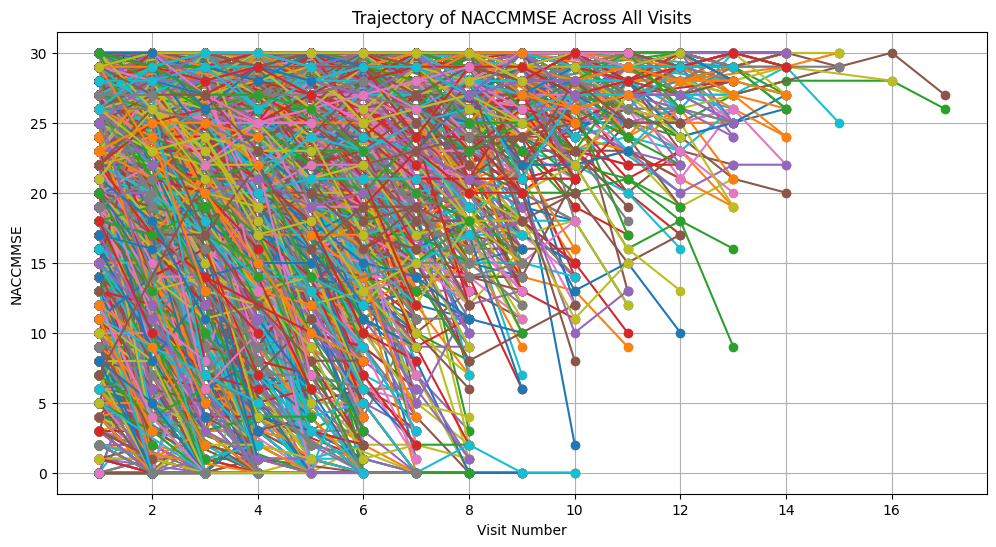

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('uds.csv')

id = 'NACCID'
num_visits = 'NACCVNUM'
nacc_moca_score = 'NACCMMSE'

# Filter the DataFrame to include only NACCMMSE values between 0 and 30
df_filtered = df[(df[nacc_moca_score] >= 0) & (df[nacc_moca_score] <= 30)]

# Sort the DataFrame by ID and visit number
df_sorted = df_filtered.sort_values(by=[id, num_visits])

# Plot the trajectory of the variable across all visits
plt.figure(figsize=(12, 6))
for participant_id in df_sorted[id].unique():
    participant_data = df_sorted[df_sorted[id] == participant_id]
    plt.plot(participant_data[num_visits], participant_data[nacc_moca_score], marker='o')

plt.xlabel('Visit Number')
plt.ylabel('NACCMMSE')
plt.title('Trajectory of NACCMMSE Across All Visits')
plt.grid(True)
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\2677433128.py:5: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('uds.csv')


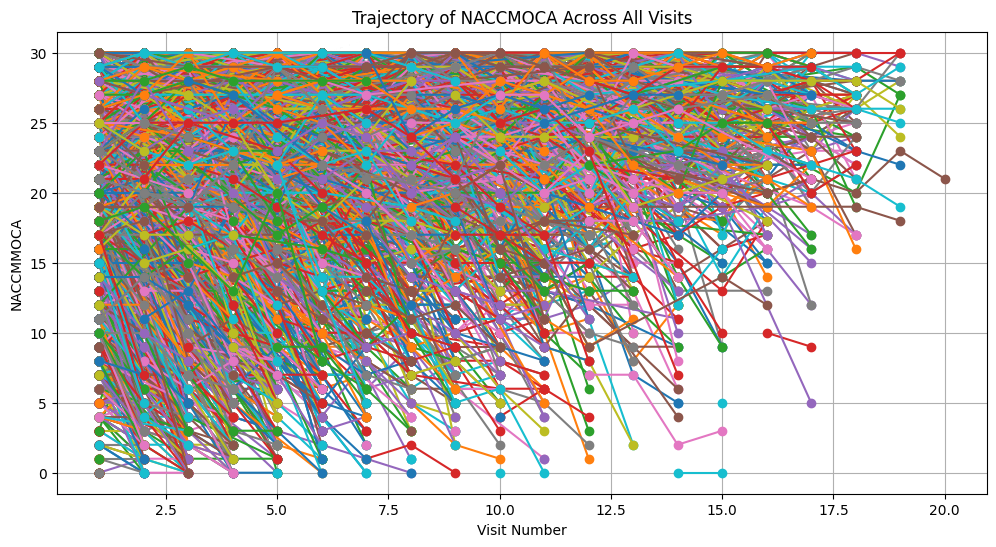

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('uds.csv')

id = 'NACCID'
num_visits = 'NACCVNUM'
nacc_moca_score = 'NACCMOCA'

# Filter the DataFrame to include only NACCMMSE values between 0 and 30
df_filtered = df[(df[nacc_moca_score] >= 0) & (df[nacc_moca_score] <= 30)]

# Sort the DataFrame by ID and visit number
df_sorted = df_filtered.sort_values(by=[id, num_visits])

# Plot the trajectory of the variable across all visits
plt.figure(figsize=(12, 6))
for participant_id in df_sorted[id].unique():
    participant_data = df_sorted[df_sorted[id] == participant_id]
    plt.plot(participant_data[num_visits], participant_data[nacc_moca_score], marker='o')

plt.xlabel('Visit Number')
plt.ylabel('NACCMMOCA')
plt.title('Trajectory of NACCMOCA Across All Visits')
plt.grid(True)
plt.show()

I want to get a look at how many of each subgroup, CN, MCI and AD. I might be able to get. 

In [7]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('uds.csv')

id = 'NACCID'
CN = 'NORMCOG'
AD = 'NACCALZP'
MCI = 'NACCUDSD'

# Calculate the proportions of each subgroup
cn_proportion = df[CN].value_counts(normalize=True)
ad_proportion = df[AD].value_counts(normalize=True)
mci_proportion = df[MCI].value_counts(normalize=True)

# Print the proportions
print("Proportion of CN (Normal Cognition):")
print(cn_proportion)
print("\nProportion of AD (Alzheimer's Disease):")
print(ad_proportion)
print("\nProportion of MCI (Mild Cognitive Impairment):")
print(mci_proportion)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\2416139075.py:4: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('uds.csv')


Proportion of CN (Normal Cognition):
NORMCOG
0    0.513653
1    0.486347
Name: proportion, dtype: float64

Proportion of AD (Alzheimer's Disease):
NACCALZP
8    0.486347
1    0.328470
7    0.166545
2    0.018433
3    0.000205
Name: proportion, dtype: float64

Proportion of MCI (Mild Cognitive Impairment):
NACCUDSD
1    0.486347
4    0.295037
3    0.174727
2    0.043889
Name: proportion, dtype: float64


Making a UDS unique ds list

In [8]:
df = pd.read_csv('uds.csv')
    
unique_ids = df[id].unique()

unique_ids_df = pd.DataFrame(unique_ids, columns=['NACCID'])

unique_ids_df.to_csv('unique_ids.txt', index=False, header=False)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_9076\3211990609.py:1: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('uds.csv')


Cohort Separation


In [1]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('uds.csv')

id = 'NACCID'
CN = 'NORMCOG'
AD = 'NACCALZP'
MCI = 'NACCTMCI'

# Create separate DataFrames for each subgroup
df_cn = df[df[CN] == 1]
df_ad = df[(df[AD] == 1) | (df[AD] == 2)]
df_mci = df[df[MCI] == 3]

# Read the unique IDs
unique_ids_df = pd.read_csv('unique_ids.txt', header=None, names=['NACCID'])
unique_ids = unique_ids_df['NACCID'].unique()

# Group responses in an array format
grouped_responses = []

for unique_id in unique_ids:
    participant_data = df[df[id] == unique_id]
    responses = []
    for _, row in participant_data.iterrows():
        if row[CN] == 1:
            responses.append('CN')
        elif row[AD] == 1 or row[AD] == 2:
            responses.append('AD')
        elif row[MCI] == 3:
            responses.append('MCI')
        else:
            responses.append('Unknown')
    grouped_responses.append((unique_id, responses))

# Convert to DataFrame for better visualization
grouped_responses_df = pd.DataFrame(grouped_responses, columns=['NACCID', 'Responses'])

# Display the grouped responses
print(grouped_responses_df)



C:\Users\Andrew\AppData\Local\Temp\ipykernel_22140\2020144889.py:4: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('uds.csv')


           NACCID                    Responses
0      NACC002909                     [AD, AD]
1      NACC003487                         [CN]
2      NACC004352                         [AD]
3      NACC004687                         [CN]
4      NACC007213                    [Unknown]
...           ...                          ...
52532  NACC994463             [AD, AD, AD, AD]
52533  NACC995870                [CN, CN, MCI]
52534  NACC998475  [Unknown, Unknown, Unknown]
52535  NACC999391            [Unknown, AD, AD]
52536  NACC999420                         [CN]

[52537 rows x 2 columns]


In [2]:
response_combinations = grouped_responses_df['Responses'].value_counts()

# Display the counts for each unique combination of responses
print("Counts for each unique combination of responses:")
print(response_combinations)

grouped_responses_df.to_csv('grouped_responses.csv', index=False)

Counts for each unique combination of responses:
Responses
[AD]                                                                  6845
[CN]                                                                  5514
[Unknown]                                                             4057
[AD, AD]                                                              3511
[CN, CN]                                                              2774
                                                                      ... 
[Unknown, MCI, AD, AD, AD, AD, AD]                                       1
[MCI, MCI, Unknown, AD, AD, AD, MCI]                                     1
[MCI, Unknown, MCI, MCI, CN, CN, Unknown, CN, Unknown, AD, CN, CN]       1
[Unknown, Unknown, CN, CN, CN, CN, CN, MCI, AD, AD]                      1
[MCI, CN, Unknown, Unknown, AD]                                          1
Name: count, Length: 3319, dtype: int64


### 11-19 I am attempting to use Zipfs law to analyze the possible sequence labels 

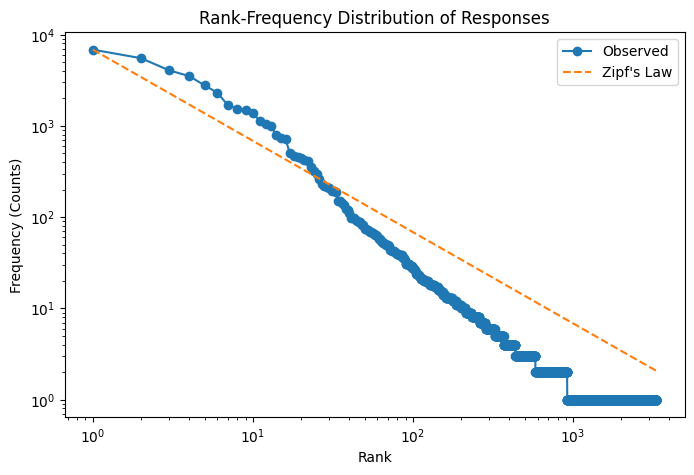

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the grouped responses CSV file
grouped_responses_df = pd.read_csv('grouped_responses.csv')

# Assign the correct column names
grouped_responses_df.columns = ['NACCID', 'Responses']

# Convert the 'Responses' column from string to list
grouped_responses_df['Responses'] = grouped_responses_df['Responses'].apply(eval)

# Convert the 'Responses' column from list to tuple
grouped_responses_df['Responses'] = grouped_responses_df['Responses'].apply(tuple)

# Count the occurrences of each unique combination of responses
response_combinations = grouped_responses_df['Responses'].value_counts()

# Convert to DataFrame and rename the column to 'Counts'
response_combinations_df = response_combinations.reset_index()
response_combinations_df.columns = ['Responses', 'Counts']

# Merge the counts back to the original DataFrame
grouped_responses_df = grouped_responses_df.merge(response_combinations_df, on='Responses', how='left')

# Sort by counts in descending order
grouped_responses_df = grouped_responses_df.sort_values("Counts", ascending=False).reset_index(drop=True)

# Save the updated DataFrame to the CSV file with three columns: NACCID, Responses, and Counts
grouped_responses_df.to_csv('response_combinations.csv', index=False)

# Add rank
response_combinations_df = response_combinations_df.sort_values("Counts", ascending=False).reset_index(drop=True)
response_combinations_df["Rank"] = np.arange(1, len(response_combinations_df) + 1)

# Visualize
plt.figure(figsize=(8, 5))
plt.loglog(response_combinations_df["Rank"], response_combinations_df["Counts"], marker="o", label="Observed")
plt.loglog(response_combinations_df["Rank"], response_combinations_df["Counts"].iloc[0] / response_combinations_df["Rank"], linestyle="--", label="Zipf's Law")
plt.xlabel("Rank")
plt.ylabel("Frequency (Counts)")
plt.title("Rank-Frequency Distribution of Responses")
plt.legend()
plt.show()





In [ ]:
from numpy.random import choice

# Create a list of responses and their probabilities
responses = df["Responses"].tolist()
probabilities = df["Counts"] / df["Counts"].sum()

# Generate synthetic sequences
synthetic_sequences = choice(responses, size=10000, p=probabilities)

# Print an example of generated sequences
print(synthetic_sequences[:10])

['[CN, CN]' '[CN, CN, CN]' '[CN, CN, CN, CN]' '[Unknown]' '[AD, AD, AD]'
 '[AD, AD]' '[AD]' '[AD]' '[AD]' '[CN]']
